<a href="https://colab.research.google.com/github/2403a52009-bot/NLP/blob/main/nlp_asn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install & import required NLP libraries

In [23]:
!pip install nltk spacy matplotlib seaborn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 108.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Import libraries

In [24]:
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Download NLTK resources

In [25]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Select / write a short academic essay

In [26]:
essay_text = """
Artificial Intelligence has become a fundamental area of research in computer science.
Researchers analyze data to develop intelligent systems that can learn and adapt.
These systems improve decision making and enhance problem solving capabilities.
Academic institutions emphasize critical thinking and innovation through AI education.
"""

Tokenize the essay into words (NLTK)

In [27]:
tokens = nltk.word_tokenize(essay_text)
tokens

['Artificial',
 'Intelligence',
 'has',
 'become',
 'a',
 'fundamental',
 'area',
 'of',
 'research',
 'in',
 'computer',
 'science',
 '.',
 'Researchers',
 'analyze',
 'data',
 'to',
 'develop',
 'intelligent',
 'systems',
 'that',
 'can',
 'learn',
 'and',
 'adapt',
 '.',
 'These',
 'systems',
 'improve',
 'decision',
 'making',
 'and',
 'enhance',
 'problem',
 'solving',
 'capabilities',
 '.',
 'Academic',
 'institutions',
 'emphasize',
 'critical',
 'thinking',
 'and',
 'innovation',
 'through',
 'AI',
 'education',
 '.']

POS tagging using NLTK

In [28]:
nltk_pos_tags = nltk.pos_tag(tokens)
nltk_pos_tags

[('Artificial', 'JJ'),
 ('Intelligence', 'NNP'),
 ('has', 'VBZ'),
 ('become', 'VBN'),
 ('a', 'DT'),
 ('fundamental', 'JJ'),
 ('area', 'NN'),
 ('of', 'IN'),
 ('research', 'NN'),
 ('in', 'IN'),
 ('computer', 'NN'),
 ('science', 'NN'),
 ('.', '.'),
 ('Researchers', 'NNP'),
 ('analyze', 'VBZ'),
 ('data', 'NNS'),
 ('to', 'TO'),
 ('develop', 'VB'),
 ('intelligent', 'JJ'),
 ('systems', 'NNS'),
 ('that', 'WDT'),
 ('can', 'MD'),
 ('learn', 'VB'),
 ('and', 'CC'),
 ('adapt', 'VB'),
 ('.', '.'),
 ('These', 'DT'),
 ('systems', 'NNS'),
 ('improve', 'VBP'),
 ('decision', 'NN'),
 ('making', 'NN'),
 ('and', 'CC'),
 ('enhance', 'NN'),
 ('problem', 'NN'),
 ('solving', 'VBG'),
 ('capabilities', 'NNS'),
 ('.', '.'),
 ('Academic', 'NNP'),
 ('institutions', 'NNS'),
 ('emphasize', 'VB'),
 ('critical', 'JJ'),
 ('thinking', 'NN'),
 ('and', 'CC'),
 ('innovation', 'NN'),
 ('through', 'IN'),
 ('AI', 'NNP'),
 ('education', 'NN'),
 ('.', '.')]

Observation:
NLTK uses Penn Treebank tags like:

NN, NNS → Nouns

VB, VBD, VBG → Verbs

POS tagging using spaCy

Load spaCy model

In [29]:
nlp = spacy.load("en_core_web_sm")

spaCy POS tagging

In [30]:
doc = nlp(essay_text)

spacy_pos_tags = [(token.text, token.pos_) for token in doc]
spacy_pos_tags

[('\n', 'SPACE'),
 ('Artificial', 'PROPN'),
 ('Intelligence', 'PROPN'),
 ('has', 'AUX'),
 ('become', 'VERB'),
 ('a', 'DET'),
 ('fundamental', 'ADJ'),
 ('area', 'NOUN'),
 ('of', 'ADP'),
 ('research', 'NOUN'),
 ('in', 'ADP'),
 ('computer', 'NOUN'),
 ('science', 'NOUN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Researchers', 'NOUN'),
 ('analyze', 'VERB'),
 ('data', 'NOUN'),
 ('to', 'PART'),
 ('develop', 'VERB'),
 ('intelligent', 'ADJ'),
 ('systems', 'NOUN'),
 ('that', 'PRON'),
 ('can', 'AUX'),
 ('learn', 'VERB'),
 ('and', 'CCONJ'),
 ('adapt', 'VERB'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('These', 'DET'),
 ('systems', 'NOUN'),
 ('improve', 'VERB'),
 ('decision', 'NOUN'),
 ('making', 'NOUN'),
 ('and', 'CCONJ'),
 ('enhance', 'VERB'),
 ('problem', 'NOUN'),
 ('solving', 'VERB'),
 ('capabilities', 'NOUN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Academic', 'ADJ'),
 ('institutions', 'NOUN'),
 ('emphasize', 'VERB'),
 ('critical', 'ADJ'),
 ('thinking', 'NOUN'),
 ('and', 'CCONJ'),
 ('innovation', 'NOUN'

Observation:
spaCy uses Universal POS tags like:

NOUN

VERB

Compare NLTK vs spaCy tag sets

In [31]:
print("NLTK POS Tags (sample):")
print(nltk_pos_tags[:10])

print("\nspaCy POS Tags (sample):")
print(spacy_pos_tags[:10])

NLTK POS Tags (sample):
[('Artificial', 'JJ'), ('Intelligence', 'NNP'), ('has', 'VBZ'), ('become', 'VBN'), ('a', 'DT'), ('fundamental', 'JJ'), ('area', 'NN'), ('of', 'IN'), ('research', 'NN'), ('in', 'IN')]

spaCy POS Tags (sample):
[('\n', 'SPACE'), ('Artificial', 'PROPN'), ('Intelligence', 'PROPN'), ('has', 'AUX'), ('become', 'VERB'), ('a', 'DET'), ('fundamental', 'ADJ'), ('area', 'NOUN'), ('of', 'ADP'), ('research', 'NOUN')]


Identify nouns (concepts) & verbs (arguments)

In [32]:
# From NLTK
nltk_nouns = [word for word, tag in nltk_pos_tags if tag.startswith('NN')]
nltk_verbs = [word for word, tag in nltk_pos_tags if tag.startswith('VB')]

# From spaCy
spacy_nouns = [token.text for token in doc if token.pos_ == 'NOUN']
spacy_verbs = [token.text for token in doc if token.pos_ == 'VERB']

nltk_nouns, nltk_verbs


(['Intelligence',
  'area',
  'research',
  'computer',
  'science',
  'Researchers',
  'data',
  'systems',
  'systems',
  'decision',
  'making',
  'enhance',
  'problem',
  'capabilities',
  'Academic',
  'institutions',
  'thinking',
  'innovation',
  'AI',
  'education'],
 ['has',
  'become',
  'analyze',
  'develop',
  'learn',
  'adapt',
  'improve',
  'solving',
  'emphasize'])

Calculate frequency of nouns & verbs

In [33]:
nltk_noun_freq = Counter(nltk_nouns)
nltk_verb_freq = Counter(nltk_verbs)

spacy_noun_freq = Counter(spacy_nouns)
spacy_verb_freq = Counter(spacy_verbs)

nltk_noun_freq, nltk_verb_freq

(Counter({'Intelligence': 1,
          'area': 1,
          'research': 1,
          'computer': 1,
          'science': 1,
          'Researchers': 1,
          'data': 1,
          'systems': 2,
          'decision': 1,
          'making': 1,
          'enhance': 1,
          'problem': 1,
          'capabilities': 1,
          'Academic': 1,
          'institutions': 1,
          'thinking': 1,
          'innovation': 1,
          'AI': 1,
          'education': 1}),
 Counter({'has': 1,
          'become': 1,
          'analyze': 1,
          'develop': 1,
          'learn': 1,
          'adapt': 1,
          'improve': 1,
          'solving': 1,
          'emphasize': 1}))

Organize results in structured form

In [34]:
import pandas as pd

nltk_noun_df = pd.DataFrame(nltk_noun_freq.items(), columns=["Noun", "Frequency"])
nltk_verb_df = pd.DataFrame(nltk_verb_freq.items(), columns=["Verb", "Frequency"])

spacy_noun_df = pd.DataFrame(spacy_noun_freq.items(), columns=["Noun", "Frequency"])
spacy_verb_df = pd.DataFrame(spacy_verb_freq.items(), columns=["Verb", "Frequency"])

nltk_noun_df, nltk_verb_df


(            Noun  Frequency
 0   Intelligence          1
 1           area          1
 2       research          1
 3       computer          1
 4        science          1
 5    Researchers          1
 6           data          1
 7        systems          2
 8       decision          1
 9         making          1
 10       enhance          1
 11       problem          1
 12  capabilities          1
 13      Academic          1
 14  institutions          1
 15      thinking          1
 16    innovation          1
 17            AI          1
 18     education          1,
         Verb  Frequency
 0        has          1
 1     become          1
 2    analyze          1
 3    develop          1
 4      learn          1
 5      adapt          1
 6    improve          1
 7    solving          1
 8  emphasize          1)

Visualize noun & verb frequencies

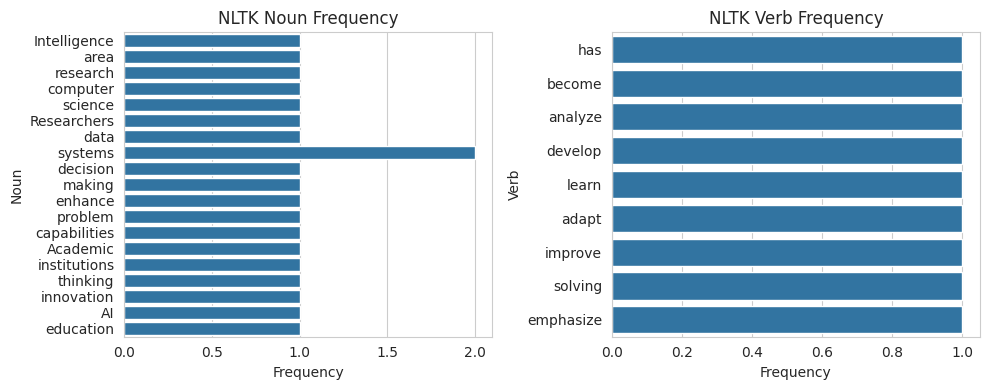

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(x="Frequency", y="Noun", data=nltk_noun_df)
plt.title("NLTK Noun Frequency")

plt.subplot(1,2,2)
sns.barplot(x="Frequency", y="Verb", data=nltk_verb_df)
plt.title("NLTK Verb Frequency")

plt.tight_layout()
plt.show()
